In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#I manually chopped out SOL as easier to work with one asset to start
df = pd.read_csv(r"C:/Users/asus/Desktop/Work/LiqTest/SOLSPLIT.csv")
#Name some columns
df2 = df.set_axis(['Time', 'Asset', 'MP', 'LiqSell', 'LS', 'Liqbuy', 'LB'], axis=1)
df2.head()

,Time,Asset,MP,LiqSell,LS,Liqbuy,LB
0,2024/04/17 10:46:17:564 | Info | Spr...,SOLUSDT,136.2775,LiqSell,0.0,LiqBuy,0.0
1,2024/04/17 10:46:18:696 | Info | Spr...,SOLUSDT,136.2775,LiqSell,0.0,LiqBuy,0.0
2,2024/04/17 10:46:19:805 | Info | Spr...,SOLUSDT,136.2875,LiqSell,0.0,LiqBuy,0.0
3,2024/04/17 10:46:20:929 | Info | Spr...,SOLUSDT,136.2875,LiqSell,0.0,LiqBuy,0.0
4,2024/04/17 10:46:22:028 | Info | Spr...,SOLUSDT,136.3175,LiqSell,0.0,LiqBuy,0.0


In [38]:
# Convert the 'LS' and LB columns to float
df2['LS'] = df2['LS'].astype(float)
df2['LB'] = df2['LB'].astype(float)
# Convert non zero values in the 'LS' column to 1 and non zero value in LB to -1 for long/short trade signal purposes
df2['LS'] = df2['LS'].apply(lambda x: 1 if x > 0 else x)
df2['LB'] = df2['LB'].apply(lambda x: -1 if x > 0 else x)

In [39]:
#This shifts time ahead so we can consider an entry signal that holds for x periods this does not look at prior market return

df2['Entry']=df2['MP'].shift(-1)#Shifted 1 period ahead of our signal as we begin quoting after recieving signal
df2['Entry+1']=df2['MP'].shift(-2)#This is 2 periods after the signal but 1 period after our expected entry
df2['Entry+5']=df2['MP'].shift(-6)
df2['Entry+10']=df2['MP'].shift(-11)
df2['Entry+30']=df2['MP'].shift(-31)
df2['Entry+60']=df2['MP'].shift(-61)
df2['Entry+300']=df2['MP'].shift(-301)

In [40]:
#Long and hold results for x seconds after a liquidation sell from Binance
df2['Long1s'] = df2['LS']*((df2['Entry+1'] - df2['Entry']) / df2['Entry'])
df2['Long5s'] = df2['LS']*((df2['Entry+5'] - df2['Entry']) / df2['Entry'])
df2['Long10s'] = df2['LS']*((df2['Entry+10'] - df2['Entry']) / df2['Entry'])
df2['Long30s'] = df2['LS']*((df2['Entry+30'] - df2['Entry']) / df2['Entry'])
df2['Long60s'] = df2['LS']*((df2['Entry+60'] - df2['Entry']) / df2['Entry'])
df2['Long300s'] = df2['LS']*((df2['Entry+300'] - df2['Entry']) / df2['Entry'])

#Short and hold for x seconds after a liquidation buy from Binance
df2['Short1s'] = df2['LB']*((df2['Entry+1'] - df2['Entry']) / df2['Entry'])
df2['Short5s'] = df2['LB']*((df2['Entry+5'] - df2['Entry']) / df2['Entry'])
df2['Short10s'] = df2['LB']*((df2['Entry+10'] - df2['Entry']) / df2['Entry'])
df2['Short30s'] = df2['LB']*((df2['Entry+30'] - df2['Entry']) / df2['Entry'])
df2['Short60s'] = df2['LB']*((df2['Entry+60'] - df2['Entry']) / df2['Entry'])
df2['Short300s'] = df2['LB']*((df2['Entry+300'] - df2['Entry']) / df2['Entry'])

In [41]:
print(f"The return when buying short liquidations for 1s is:{df2['Long1s'].sum()}")
print(f"The return when buying short liquidations for 5s is:{df2['Long5s'].sum()}")
print(f"The return when buying short liquidations for 10s is:{df2['Long10s'].sum()}")
print(f"The return when buying short liquidations for 30s is:{df2['Long30s'].sum()}")
print(f"The return when buying short liquidations for 60s is:{df2['Long60s'].sum()}")
print(f"The return when buying short liquidations for 300s is:{df2['Long300s'].sum()}")
print(f"The return when selling long liquidations for 1s is:{df2['Short1s'].sum()}")
print(f"The return when selling long liquidations for 5s is:{df2['Short5s'].sum()}")
print(f"The return when selling long liquidations for 10s is:{df2['Short10s'].sum()}")
print(f"The return when selling long liquidations for 30s is:{df2['Short30s'].sum()}")
print(f"The return when selling long liquidations for 60s is:{df2['Short60s'].sum()}")
print(f"The return when selling long liquidations for 300s is:{df2['Short300s'].sum()}")

The return when buying short liquidations for 1s is:0.0003277530278128172
The return when buying short liquidations for 5s is:-0.0010229402309915143
The return when buying short liquidations for 10s is:-0.00666908153376982
The return when buying short liquidations for 30s is:-0.05187287238410264
The return when buying short liquidations for 60s is:-0.08298778235957224
The return when buying short liquidations for 300s is:-0.08399486686642792
The return when selling long liquidations for 1s is:0.0009244945228364116
The return when selling long liquidations for 5s is:0.002420952945735643
The return when selling long liquidations for 10s is:-0.0012795136302962934
The return when selling long liquidations for 30s is:-0.018786337156663016
The return when selling long liquidations for 60s is:-0.06308038927122722
The return when selling long liquidations for 300s is:-0.03821909570013468


Number of Long Trades:8.0
Number of Short Trades:0.0
Estimated Trading fees for Longs:0.002128
Estimated Trading fees for Shorts:0.0
The gross return when buying short liquidations for 10s is:-0.006779577863626765
The net return when buying short liquidations for 10s is:-0.008907577863626765
The gross return when selling long liquidations for 10s is:0.0
The net return when selling long liquidations for 10s is:0.0
The win percent of longs is: 0.0
The win percent of shorts is: nan
The biggest winning trade on the long side is: nan
The biggest losing trade on the long side is: -0.0014851644981113098
The biggest winning trade on the short side is: nan
The biggest losing trade on the short side is: nan


C:\Users\asus\AppData\Local\Temp\ipykernel_13028\542549182.py:21: RuntimeWarning: invalid value encountered in scalar divide
  win_percent_short = ((df2['Short10s'] > 0).sum())/df2['LB'].sum()


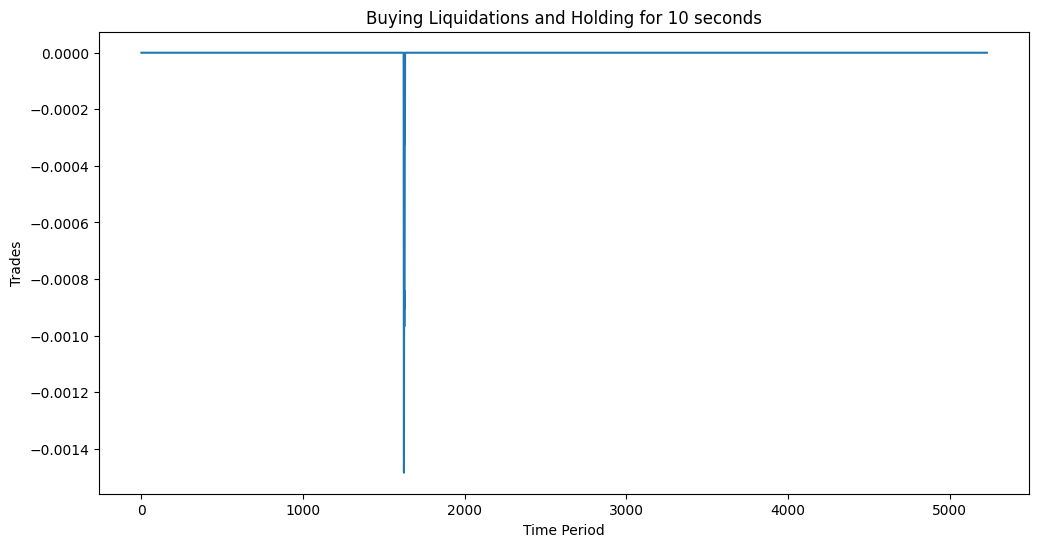

In [36]:
#How Many Roud Trips did we take?
print(f"Number of Long Trades:{df2['LS'].sum()}")
print(f"Number of Short Trades:{df2['LB'].sum()}")

#Rough estimate of fees at 50/50 maker taker assuming 0.9 bps exectution(=0.4bps+2.26bps) (I think we could be far closer to 80/20)
print(f"Estimated Trading fees for Longs:{(df2['LS'].sum())*0.000266}")
print(f"Estimated Trading fees for Shorts:{(df2['LB'].sum())*0.000266}")

#Gross PNL Long

print(f"The gross return when buying short liquidations for 10s is:{df2['Long10s'].sum()}")
print(f"The net return when buying short liquidations for 10s is:{df2['Long10s'].sum()-((df2['LS'].sum())*0.000266)}")

#Gross PNL Short

print(f"The gross return when selling long liquidations for 10s is:{df2['Short10s'].sum()}")
print(f"The net return when selling long liquidations for 10s is:{df2['Short10s'].sum()+((df2['LB'].sum())*0.000266)}")

#Win Percentage Longs / Shorts for 10second holds
win_percent_longs = ((df2['Long10s'] > 0).sum())/df2['LS'].sum()
win_percent_short = ((df2['Short10s'] > 0).sum())/df2['LB'].sum()
print(f"The win percent of longs is: {win_percent_longs}")
print(f"The win percent of shorts is: {win_percent_short}")

#Extremes When buying

Biggest_win = df2['Long10s'][df2['Long10s'] > 0].max()
Biggest_loss = df2['Long10s'][df2['Long10s'] < 0].min()

print(f"The biggest winning trade on the long side is: {Biggest_win}")
print(f"The biggest losing trade on the long side is: {Biggest_loss}")

#Extremes When Selling

Biggest_win_sell = df2['Short10s'][df2['Short10s'] > 0].max()
Biggest_loss_sell = df2['Short10s'][df2['Short10s'] < 0].min()

print(f"The biggest winning trade on the short side is: {Biggest_win_sell}")
print(f"The biggest losing trade on the short side is: {Biggest_loss_sell}")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the return stream
ax.plot(df2['Long10s'])

# Set the title and axis labels
ax.set_title('Buying Liquidations and Holding for 10 seconds')
ax.set_xlabel('Time')
ax.set_ylabel('Returns')

# Show the plot
plt.show()


In [158]:
#TODO

#add in MX DD 
#add in Sharpe
#Add in sortino

#compare with trend filter

#Do each Coin 1x1

#Combine results

#Manual test

#Consider fees

#Look at the results as a portfolio - how much correlation between results.

In [159]:
#export to check
df2.to_excel('C:/Users/asus/Desktop/Work/SOLLIQTESTS2.xlsx', index=False)
